**The Lunar Lander Environment (Reinforcement Learning)**

The lunar lander environment is a reinforcement learning problem where the goal is to train an agent (a lander) to land on a designated landing pad on the surface of the moon. Reinforcement learning is a type of machine learning technique where an agent learns to make decisions by interacting with an environment and receiving rewards or penalties for its actions. The goal is to maximize the cumulative reward over time. The environment is provided by OpenAI Gym, which is a toolkit for developing and comparing reinforcement learning algorithms.

**Problem Statement**

The goal of the Lunar Lander environment is to implement a Deep Q-Learning alorithm using TensorFlow to land the lunar lander safely on the landing pad on the surface of the moon. The landing pad is designated by two flag poles and its center is at coordinates (0,0), but the lander is also allowed to land outside of the landing pad. The lander starts at the top center of the environment with a random initial force applied to its center of mass and has infinite fuel.

**Markov Decision Process (MDP)**

The lunar lander environment is modeled as a Markov Decision Process, which is a formal framework for describing reinforcement learning problems. In an MDP, the future depends only on the current state and not on the history of how the agent got there. The agent interacts with the environment by choosing actions, observing new states, and receiving rewards. The lunar lander environment consists of the following:

* **State**- The current position, velocity, and other relevant variables that describe the lander's situation.

* **Action**- The agent's choice of applying force to the lander's engines in a particular direction.

* **Reward**- The feedback signal that the agent receives based on its actions (e.g., a positive reward for a successful landing, a negative reward for crashing or running out of fuel).

* **Transition Function**- The dynamics that determine how the lander's state changes based on the current state and the agent's action.

**Deep Q-Learning**

Deep Q-Learning is a popular reinforcement learning algorithm that combines Q-learning (a value-based method) with deep neural networks. The agent learns to estimate the expected future rewards (Q-values) for each state-action pair, and then takes the action with the highest Q-value in a given state.

**TensorFlow**

TensorFlow is a popular open-source machine learning library developed by Google. In the lunar lander environment, TensorFlow can be used to build and train the deep neural networks that approximate the Q-function for the agent.

**Agent Actions**

It's important to note that the agent has 4 discrete actions available, each corresponding to a numerical value:

1. Do nothing= 0
2. Fire right engine= 1
3. Fire main engine= 2
4. Fire left engine= 3

**Observation Space & Action Space**

In reinforcement learning, the observation space defines what information the agent receives from the environment at each step. It can include things like the position, velocity, and orientation of the Lunar Lander.

The action space defines the set of actions the agent can take. For the Lunar Lander, there are 4 discrete actions, which were already mentioned previously.

This information is crucial for designing the neural network. The size of the state vector (8 in this case) determines the number of input neurons to the network and the number of possible actions (4), determines the number of output neurons, where each neuron represents the probability of taking a particular action.

In [1]:
# Mount Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!apt-get update
!apt-get install -y swig

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:7 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,154 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/main amd64 Packages [2,317 kB]
Get:9 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,113 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 Packages [2,593 kB]
Ign:11 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,442 kB]
Get:13 http://archive.ubuntu.com/ubuntu jammy-updates/r

In [3]:
# Pip installations
!pip install gym[box2d]
!pip show tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 87.7 MB/s eta 0:00:00
  Created wheel for box2d-py: filename=box2d_py-2.3.5-cp310-cp310-linux_x86_64.whl size=2349117 sha256=77025c722b9347ad424310cad9a4353a4fa1d42859a961ddcb2ff09555b67bd3
  Stored in directory: /root/.cache/pip/wheels/db/8f/6a/eaaadf056fba10a98d986f6dce954e6201ba3126926fc5ad9e
Successfully built box2d-py
  Attempting uninstall: pygame
    Found existing installation: pygame 2.6.0
    Uninstalling pygame-2.6.0:
      Successfully uninstalled pygame-2.6.0
Name: tensorflow
Version: 2.17.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.10

In [4]:
# Import necessary libraries and packages
import os
import cv2
import gym
import time
import psutil
import random
import numpy as np
import pandas as pd
from collections import deque, namedtuple

from gym.wrappers import NormalizeObservation, TimeLimit, ClipAction

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.losses import MSE
from tensorflow.keras.optimizers import Adam

import matplotlib.pyplot as plt
%matplotlib inline

print('GPU Available:', tf.test.is_gpu_available())

/usr/local/lib/python3.10/dist-packages/tensorflow/lite/python/util.py:55: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


GPU Available: True


In [5]:
# Setting the ranomd seed for Tensorflow
tf.random.set_seed(42)

In [6]:
# Create the Lunar Lander environment
env= gym.make('LunarLander-v2')

# Get state and action sizes
state_size= env.observation_space.shape[0] # Number of state values
num_actions= env.action_space.n # Number of possible actions

# Print the state size and number of actions
print('State Size:', state_size)
print('Number of Actions: ', num_actions)

# Always close the environment after use
env.close()

State Size: 8
Number of Actions:  4


/usr/local/lib/python3.10/dist-packages/gym/core.py:317: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/usr/local/lib/python3.10/dist-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


**State Size (8)**

The Lunar Lander's state is a vector that describes its current situation. It consists of 8 components:

1. **x position**- The horizontal position of the lander.

2. **y position**- The vertical position of the lander.

3. **x velocity**- The horizontal velocity of the lander.

4. **y velocity**- The vertical velocity of the lander.

5. **angle**- The angle of the lander in radians.

6. **angular velocity**- The angular velocity of the lander in radians per second.

7. **left leg contact**- A boolean (1 or 0) indicating if the left leg is in contact with the ground.

8. **right leg contact**- A boolean (1 or 0) indicating if the right leg is in contact with the ground.


**Resetting the Environment**

I'm going to reset the environment to its initial state using *env.reset()*. This ensures that each episode begins from a defined point, preventing the agent from continuing from a previous state. In addition to resetting the environment, *env.reset()* returns the initial observation of the agent in this new episode. This observation is crucial as it serves as the starting point for the agent's decision-making process.

It's important to note that the initial observation is crucial as it serves as the starting point for the agent's decision-making process. Furthermore, if the environment isn't reset between episodes, the agent might start from an arbitrary state reached in the previous episode. This can introduce bias into the learning process because the agent's actions and the resulting rewards would depend on the final state of the previous episode. Resetting helps ensure that the learning process starts fresh fresh (yes, double fresh) with each episode.

In [7]:
# Reset the environment
initial_state= env.reset()

# Print the initial state
print('Initial State: ', initial_state)

Initial State:  [-1.0253906e-03  1.4161525e+00 -1.0388808e-01  2.3254700e-01
  1.1950731e-03  2.3532201e-02  0.0000000e+00  0.0000000e+00]


**Action**

Once the environment is reset, the agent can start taking action. It's important to note that the agent can only take one action per time step. Just as a reminder, in the Lunar Lander environment, you have four discrete actions:

0: Do nothing

1: Fire the right engine

2: Fire the main engine

3: Fire the left engine

In [8]:
# Select an action (fire main engine)
action= 2

# Take a step in the environment using the selected action
next_state, reward, done, info= env.step(action)

# Print the results after taking the action
print('Next State: ', next_state)
print('Reward: ', reward)
print('Done: ', done) # True if the episode is over (either terminated or truncated)
print('Info: ', info) # Any additional diagnostic information

Next State:  [-0.00202475  1.422364   -0.10124739  0.276072    0.00249057  0.02591277
  0.          0.        ]
Reward:  -4.986292804069978
Done:  False
Info:  {}


/usr/local/lib/python3.10/dist-packages/gym/utils/passive_env_checker.py:241: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


- **Next State:** The state of the lander after taking the action. These values are just the corresponding values from the 8 dimensional array representing the new state of the lander after taking action (in this case, firing the main engine).
- **Reward:** A negative reward, which suggests that the action taken wasn’t very favorable.
- **Done:** False, meaning the episode isn’t over yet.
- **Info:** An empty dictionary, as there’s no extra information in this case.

**Updating the Current State**

After taking the action and receiving the feedback from the environment, I’ll update the current state of the agent with the new state returned by env.step():

In [9]:
# Update the current state
current_state= next_state

- Now that the environment interactions are working, it's time to move on to the Deep Q-Learning (DQN) algorithm.

**Deep Q-Learning (DQN)**

The following information includes core concepts pertaining to the lunar lander environment. These concepts are crucial for the Deep Q-Learning algorithm because they address challenges in reinforcement learning, such as instability, inefficient learning, and the need for accurate Q-value approximation.

1. **Q-Networks**- In reinforcement learning, the Q-function, denoted as Q(s, a), estimates the expected future reward for taking action a in state s. In essence, it says how "good" it is to take a specific action in a given situation. In DQN, a neural network is used to approximate this Q-function. This network takes the state as input and outputs Q-values for each possible action. In the lunar lander environment, the Q-Network takes the current state (which could be the position, velocity, angle, etc.) as input and outputs the estimated Q-values for each possible action (applying force in different directions, for example). The goal is to learn the optimal Q-values, which will guide the agent to take actions that maximize the cumulative reward (in other words, achieve a successful landing).

2. **The Bellman Equation**- The Bellman equation is a fundamental equation in reinforcement learning that defines the relationship between the Q-value of a state-action pair and the Q-value of the next state-action pair. It expresses the idea that the optimal Q-value for a state-action pair is equal to the immediate reward received for taking that action plus the discounted maximum Q-value of the next state over all possible actions. In the lunar lander environment, the Bellman equation allows us to update the Q-values based on the observed rewards and transitions, enabling the Q-Network to learn the optimal policy (a set of actions that will lead to the highest reward) iteratively.This equation helps the agent understand the value of taking certain actions in specific situations.

3. **Target Networks**- A second neural network, identical in structure to the Q-network, is introduced. This is called the target network. Its purpose is to provide stable target values for training the Q-network. The target network's weights are updated periodically by copying the weights of the Q-network. In this environment, using a Target Network helps stabilize the training process and improves the convergence of the Q-Network towards the optimal policy.

4. **Experience Replay**- This is a technique where the agent stores its experiences (state, action, reward, next state) in a memory buffer. During training, batches of experiences are randomly sampled from this buffer to update the Q-network. This helps break correlations between consecutive experiences and improves learning stability. Experience Replay improves the efficiency of learning by reusing past experiences and decorrelating the samples used for training the Q-Network.

Deep Q-Learning faces instability issues due to the constantly changing nature of the Q-values during learning. By using a target network and experience replay, it stabilizes the learning process. The target network provides consistent target values, and experience replay helps decorrelate updates and reduce variance.

In simpler terms, through iterative updates using the Bellman equation and the target network, the Q-network gradually learns to approximate the optimal Q-function, leading to better decision-making by the agent.

Basically, the training process goes as follows:

1. The agent starts by exploring randomly, collecting experiences.

2. Experiences are stored in the replay buffer.

3. Batches of experiences are sampled from the buffer.

4. For each experience, the target network is used to calculate the target Q-value.

5. The Q-network is updated to minimize the difference between its predicted Q-value and the target Q-value.

6. Periodically, the target network's weights are updated to match the Q-network's weights.

With these concepts in mind, let's proceed to implement the DQN algorithm.

In [22]:
# Define hyperparameters
MEMORY_SIZE= 50_000 # Size of the replay buffer
GAMMA= 0.995 # Discount factor for future rewards
ALPHA= 1e-4 # Learning rate for the optimizer
NUM_STEPS_FOR_UPDATE= 4 # How often to update the Q-Network

# Create the Q-Network
q_network= Sequential([
    Input(shape= (state_size,)),
    Dense(units= 32, activation= 'relu'),
    Dense(units= 32, activation= 'relu'),
    Dense(units= num_actions, activation= 'linear')
])

# Create the target Q-Network
target_q_network= Sequential([
    Input(shape= (state_size,)),
    Dense(units= 32, activation= 'relu'),
    Dense(units= 32, activation= 'relu'),
    Dense(units= num_actions, activation= 'linear')
])

# Set the Adam optimizer with a learning rate
optimizer= Adam(learning_rate= ALPHA)

# Print the model summaries
print(q_network.summary())
print(target_q_network.summary())

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,476 (5.77 KB)

 Trainable params: 1,476 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

None


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_9 (Dense)                      │ (None, 32)                  │             288 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,476 (5.77 KB)

 Trainable params: 1,476 (5.77 KB)

 Non-trainable params: 0 (0.00 B)

None


**Experience Replay Buffer**

Now that the Q-Networks are set up, the next step is to implement the Experience Replay Buffer. This buffer stores the agent’s experiences (state, action, reward, next state, and whether the episode ended) so that batches of experiences can be sampled for training. This helps break the correlation between consecutive experiences and makes learning more stable

In [23]:
# Define the Experience class
class Experience:
  def __init__(self, state, action, reward, next_state, done):
    self.state= np.array(state)
    self.action= action
    self.reward= reward
    self.next_state= np.array(next_state)
    self.done= done

# Create the replay buffer
replay_buffer= deque(maxlen= MEMORY_SIZE)

# Example of adding an experience to the buffer
experience= Experience(initial_state, 2, -2.32, next_state, False)
replay_buffer.append(experience)

# Check the size of the buffer
print(f'Replay buffer size: {len(replay_buffer)}')

Replay buffer size: 1


**Deep Q-Network Loss**

Now, I'm going to calculate the loss for the algorithm. This loss measures how well the Q-network predicts the expected future reward (Q-values) for given states and actions.

Basically, the following function takes a batch of experiences as input, unpacks the relevant information (states, actions, rewards, etc.), and calculates the target Q-values using the Bellman equation and the target network. The target Q-values are then compared with the Q-values predicted by the main Q-network, and the mean squared error (MSE) between them is computed. This MSE loss is the output of the function and is used to update the Q-network's weights during training, ultimately improving the agent's decision-making capabilities.

In [26]:
# Define a function to compute loss
def compute_loss(experiences, gamma, q_network, target_q_network):
    states_batch = np.array([e.state for e in experiences])
    action_batch = np.array([e.action for e in experiences])
    reward_batch = np.array([e.reward for e in experiences])
    next_states_batch = np.array([e.next_state for e in experiences])
    done_batch = np.array([e.done for e in experiences])

    states_batch = tf.convert_to_tensor(states_batch, dtype=tf.float32)
    next_states_batch = tf.convert_to_tensor(next_states_batch, dtype=tf.float32)

    # Predict Q-values for current states using Q-network
    q_values = q_network(states_batch)
    q_values = tf.reduce_sum(q_values * tf.one_hot(action_batch, q_values.shape[1]), axis=1)

    # Use the primary Q-network to select the best action in the next state
    next_q_values_primary = q_network(next_states_batch)
    best_actions = tf.argmax(next_q_values_primary, axis=1)

    # Use the target Q-network to calculate the target Q-value for the best action
    next_q_values_target = target_q_network(next_states_batch)
    max_next_q_values = tf.reduce_sum(next_q_values_target * tf.one_hot(best_actions, next_q_values_target.shape[1]), axis=1)

    target_q_values = reward_batch + gamma * max_next_q_values * (1 - done_batch)
    loss = tf.reduce_mean(tf.square(q_values - target_q_values))

    return loss

In [30]:
# Define a function to update the Q-Network
def agent_learn(experiences, gamma, q_network, target_q_network, optimizer):
    # Unpack the experiences from the sampled batch
    states_batch, action_batch, reward_batch, next_states_batch, done_batch = zip(*experiences)

    # Convert batches to TensorFlow tensors
    states_batch = tf.convert_to_tensor(np.array(states_batch), dtype=tf.float32)
    next_states_batch = tf.convert_to_tensor(np.array(next_states_batch), dtype=tf.float32)
    action_batch = tf.convert_to_tensor(np.array(action_batch), dtype=tf.int32)
    reward_batch = tf.convert_to_tensor(np.array(reward_batch), dtype=tf.float32)
    done_batch = tf.convert_to_tensor(np.array(done_batch), dtype=tf.float32)

    with tf.GradientTape() as tape:
        # Compute Q values for current states and actions using the Q-network
        q_values = q_network(states_batch)
        q_values = tf.reduce_sum(q_values * tf.one_hot(action_batch, q_values.shape[1]), axis=1)

        # Compute Q values for next states using the target Q-network
        next_q_values = target_q_network(next_states_batch)
        max_next_q_values = tf.reduce_max(next_q_values, axis=1)

        # Compute the target Q values using the Bellman equation
        target_q_values = reward_batch + gamma * max_next_q_values * (1 - done_batch)

        # Compute loss (Mean Squared Error between predicted Q-values and target Q-values)
        loss = tf.reduce_mean(tf.square(q_values - target_q_values))

    # Compute the gradients of the loss with respect to the Q-network's weights
    gradients = tape.gradient(loss, q_network.trainable_variables)

    # Apply the gradients to the Q-network
    optimizer.apply_gradients(zip(gradients, q_network.trainable_variables))

    return loss.numpy()  # Return the loss as a float value

**Loop-a-Loop**

Now, let's create a loop to allow the agent to take many consecutive actions during an episode.

Reinforcement learning tasks are generally framed as episodes, where the agent starts in an initial state, interacts with the environment by taking actions, receives rewards, and eventually reaches a terminal state (in this case, successfully landing the lunar lander).

The agent needs to learn a policy that maps states to actions in a way that maximizes cumulative rewards over time. This learning happens through repeated interactions with the environment, where the agent explores different actions and learns from their consequences.

To learn effectively, reinforcement learning algorithms typically need a significant amount of experience data, consisting of transitions between states, actions, rewards, and next states. By running multiple steps within an episode, the agent can collect this valuable experience data.

Essentially, the core idea here is to create a training loop that allows the DQN agent to interact with the Lunar Lander environment, collect experiences, learn from those experiences, and gradually improve its policy (the strategy for choosing actions) over time.

In the training loop, I will introduce the **Epsilon-Greedy Concept**. This concept is a simple yet effective approach to balance exploration and exploitation in reinforcement learning. For the lunar lander environment, it means that with a probability of epsilon, the agent will take a random action (exploration) to discover potentially better strategies, and with a probability of (1-epsilon), the agent will choose the action with the highest predicted Q-value according to its current knowledge (exploitation). This balance ensures that the agent both learns about its environment and makes use of the knowledge it has gained.

Streaming output truncated to the last 5000 lines.
Episode 956, Step 32, Loss: 97.8493423461914
Episode 956, Step 36, Loss: 0.27465885877609253
Episode 956, Step 40, Loss: 0.25757449865341187
Episode 956, Step 44, Loss: 0.23667895793914795
Episode 956, Step 48, Loss: 1.7567999362945557
Episode 956, Step 52, Loss: 0.26898497343063354
Episode 956, Step 56, Loss: 1.3373521566390991
Episode 956, Step 60, Loss: 0.3622974157333374
Episode 956, Step 64, Loss: 0.4246552586555481
Episode 956, Step 68, Loss: 1.1222221851348877
Episode 956, Step 72, Loss: 0.7094672322273254
Episode 956, Step 76, Loss: 0.1899057924747467
Episode 956, Step 80, Loss: 0.10052388161420822
Episode 956, Step 84, Loss: 0.18536171317100525
Episode 956, Step 88, Loss: 0.37304696440696716
Episode 956, Step 92, Loss: 0.9152733087539673
Episode 956, Step 96, Loss: 0.3488832116127014
Episode 956, Step 100, Loss: 0.3914104998111725
Episode 956, Step 104, Loss: 2.319117784500122
Episode 956, Step 108, Loss: 0.17823049426078796
E

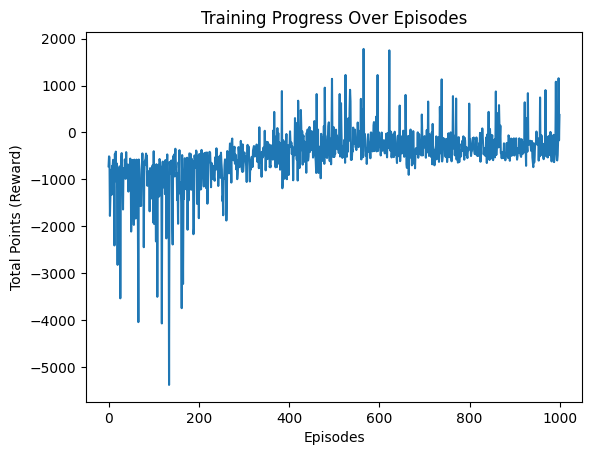

In [31]:
# Define the Experience tuple
Experience = namedtuple('Experience', ['state', 'action', 'reward', 'next_state', 'done'])



# Define hyperparameters
MEMORY_SIZE = 75_000  # Size of the replay buffer
GAMMA = 0.95  # Discount factor for future rewards
ALPHA = 1e-3  # Learning rate for the optimizer
NUM_STEPS_FOR_UPDATE = 4  # How often to update the Q-Network
update_interval = 1000  # Update Target Q-Network less frequently

# Training parameters
num_episodes = 1000  # Number of episodes to train
max_timesteps = 500  # Maximum steps per episode
batch_size = 32  # Reduced batch size
epsilon = 1.5  # Higher initial epsilon for exploration
epsilon_decay = 0.995  # Slower decay to allow for more exploration
min_epsilon = 0.01  # Minimum epsilon
total_point_history = []  # Track total rewards per episode
replay_buffer = deque(maxlen=MEMORY_SIZE)

# Set Target Network weights to match the Q-Network at the start
target_q_network.set_weights(q_network.get_weights())

# Custom reward function (reward shaping)
def custom_reward(state, reward):
    distance_to_pad = abs(state[0])  # X position relative to the pad at (0, 0)
    velocity_penalty = abs(state[2]) + abs(state[3])  # X and Y velocity penalties

    # Apply distance penalty and velocity penalty
    reward -= (distance_to_pad + velocity_penalty)

    # Reward for touching down with legs (indicating a landing attempt)
    if state[6] == 1 or state[7] == 1:  # Leg contact
        reward += 10

    return reward

# Training loop
for episode in range(num_episodes):
    state = env.reset()
    total_points = 0

    for t in range(max_timesteps):
        # Select action using Epsilon-Greedy policy
        if np.random.rand() <= epsilon:
            action = env.action_space.sample()  # Explore: random action
        else:
            state_qn = np.expand_dims(state, axis=0)
            q_values = q_network.predict(state_qn, verbose=0)
            action = np.argmax(q_values[0])  # Exploit: choose best action

        # Take the selected action and observe the result
        next_state, reward, done, _ = env.step(action)

        # Apply custom reward shaping
        reward = custom_reward(state, reward)

        total_points += reward

        # Store the experience in the replay buffer
        experience = Experience(state, action, reward, next_state, done)
        replay_buffer.append(experience)

        # If the replay buffer has enough experiences, start training
        if len(replay_buffer) >= batch_size and t % NUM_STEPS_FOR_UPDATE == 0:
            mini_batch = random.sample(replay_buffer, batch_size)
            loss = agent_learn(mini_batch, GAMMA, q_network, target_q_network, optimizer)
            print(f"Episode {episode}, Step {t}, Loss: {loss}")

        # Hard update the Target Q-Network at regular intervals (every 1000 steps)
        if t % update_interval == 0:
            target_q_network.set_weights(q_network.get_weights())

        # Update the current state
        state = next_state

        # Break the loop if the episode ends
        if done:
            break

    # Decay epsilon to reduce exploration over time
    epsilon = max(min_epsilon, epsilon_decay * epsilon)

    # Track the total points (reward) for this episode
    total_point_history.append(total_points)

    # Print progress every 100 episodes
    if episode % 100 == 0:
        avg_points = np.mean(total_point_history[-100:])  # Average over the last 100 episodes
        print(f'Episode {episode} | Average Points: {avg_points:.2f}')

    # Stop if average points exceed the target (solve the environment)
    if len(total_point_history) >= 100 and np.mean(total_point_history[-100:]) >= 200:
        print(f'Environment solved in {episode} episodes!')
        break

# Plot training results
plt.plot(total_point_history)
plt.xlabel('Episodes')
plt.ylabel('Total Points (Reward)')
plt.title('Training Progress Over Episodes')
plt.show()